# Question 1

### Step 1

In [7]:
import pandas as pd

### Step 2

In [8]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

### Step 3

In [10]:
users = pd.read_csv(url, delimiter='|')

### Step 4

In [11]:
mean_age = users.groupby('occupation')['age'].mean()
print(mean_age)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


### Step 5

In [12]:
# create a new column to represent gender as binary values
users['gender_binary'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)

# group by occupation and calculate the mean of gender_binary
gender_ratio = users.groupby('occupation')['gender_binary'].mean()

# sort the values from highest to lowest
gender_ratio = gender_ratio.sort_values(ascending=False)

print(gender_ratio)


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender_binary, dtype: float64


### Step 6

In [13]:
min_max_age = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_age)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


### Step 7

In [14]:
mean_age_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_gender)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### Step 8

In [15]:
# create a new dataframe to hold the results
gender_counts = users.groupby(['occupation', 'gender'])['gender'].count()

# calculate the total number of people in each occupation
occupation_totals = users.groupby('occupation')['gender'].count()

# calculate the percentage of each gender in each occupation
gender_percentages = (gender_counts / occupation_totals) * 100

# unstack the data to create a more readable format
gender_percentages = gender_percentages.unstack()

print(gender_percentages)


gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


# Question 2

### Step 1

In [16]:
import pandas as pd

### Step 2

In [17]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

### Step 3

In [18]:
euro12 = pd.read_csv(url)

### Step 4

In [19]:
goals = euro12['Goals']
print(goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


### Step 5

In [20]:
num_teams = euro12['Team'].count()
print(num_teams)

16


### Step 6

In [21]:
num_columns = len(euro12.columns)
print(num_columns)

35


### Step 7

In [22]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


### Step 8

In [24]:
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
print(discipline_sorted)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


### Step 9

In [25]:
mean_yellow_cards = euro12['Yellow Cards'].mean()
print(mean_yellow_cards)

7.4375


### Step 10

In [27]:
high_scoring_teams = euro12[euro12['Goals'] > 6]['Team']
print(high_scoring_teams)

5     Germany
13      Spain
Name: Team, dtype: object


### Step 11

In [28]:
G_teams = euro12[euro12['Team'].str.startswith('G')]['Team']
print(G_teams)

5    Germany
6     Greece
Name: Team, dtype: object


### Step 12

In [29]:
first_7_cols = euro12.iloc[:, :7]
print(first_7_cols)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

### Step 13

In [30]:
all_except_last_3_cols = euro12.iloc[:, :-3]
print(all_except_last_3_cols)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

### Step 14

In [31]:
# filter the rows for England, Italy, and Russia
eir = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia'])]

# select only the columns for Team and Shooting Accuracy
eir_shooting_acc = eir[['Team', 'Shooting Accuracy']]

print(eir_shooting_acc)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


# Question 3

### Step 1

In [32]:
import pandas as pd
import numpy as np

### Step 2

In [48]:
s1 = pd.Series(np.random.randint(1, 5, size=100))

s2 = pd.Series(np.random.randint(1, 4, size=100))

s3 = pd.Series(np.random.randint(10000, 30001, size=100))

In [55]:
display(s1)
display(s2)
display(s3)

0     1
1     1
2     3
3     4
4     2
     ..
95    1
96    3
97    3
98    2
99    3
Length: 100, dtype: int32

0     2
1     3
2     2
3     2
4     2
     ..
95    1
96    3
97    2
98    3
99    3
Length: 100, dtype: int32

0     12945
1     24310
2     26916
3     15743
4     25539
      ...  
95    20242
96    24493
97    17231
98    18158
99    14307
Length: 100, dtype: int32

### Step 3

In [57]:
df = pd.concat([s1, s2, s3], axis=1)
display(df)

,0,1,2
0,1,2,12945
1,1,3,24310
2,3,2,26916
3,4,2,15743
4,2,2,25539
...,...,...,...
95,1,1,20242
96,3,3,24493
97,3,2,17231
98,2,3,18158


### Step 4

In [58]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
display(df)

,bedrs,bathrs,price_sqr_meter
0,1,2,12945
1,1,3,24310
2,3,2,26916
3,4,2,15743
4,2,2,25539
...,...,...,...
95,1,1,20242
96,3,3,24493
97,3,2,17231
98,2,3,18158


### Step 5

In [59]:
bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn = bigcolumn.to_frame()
display(bigcolumn)

,0
0,1
1,1
2,3
3,4
4,2
...,...
95,20242
96,24493
97,17231
98,18158


### Step 6

In [39]:
print(bigcolumn.index.max())

99


### Step 7

In [41]:
bigcolumn.reset_index(drop=True, inplace=True)

In [42]:
print(bigcolumn.index.max())

299


# Question 4

### Step 1

In [2]:
import pandas as pd
import numpy as np

### Step 2

In [19]:
data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0, 1, 2]])

### Step 3

In [20]:
data = data.set_index('Yr_Mo_Dy')

### Step 4

In [21]:
def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.to_datetime(year * 10000 + x.month * 100 + x.day, format='%Y%m%d')

data.index = data.index.map(fix_year)

### Step 5

In [22]:
data.index = pd.to_datetime(data.index)

### Step 6

In [36]:
missing_values = data.isna().sum()
print(missing_values)

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


### Step 7

In [37]:
non_missing_values = data.count().sum()
print(non_missing_values)

78857


### Step 8

In [38]:
mean_windspeed = data.mean().mean()
print(mean_windspeed)

10.227982360836924


### Step 9

In [39]:
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()
from IPython.display import display
display(loc_stats)

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


### Step 10

In [40]:
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1, skipna=True)
day_stats['max'] = data.max(axis=1, skipna=True)
day_stats['mean'] = data.mean(axis=1, skipna=True)
day_stats['std'] = data.std(axis=1, skipna=True)
display(day_stats)

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


### Step 11

In [41]:
january_data = data[data.index.month == 1]
january_mean = january_data.mean()
print(january_mean)

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


### Step 12

In [31]:
yearly_data = data.resample('A').mean()

In [43]:
display(yearly_data)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


### Step 13

In [32]:
monthly_data = data.resample('M').mean()

In [44]:
display(monthly_data)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


### Step 14

In [33]:
weekly_data = data.resample('W').mean()

In [45]:
display(weekly_data)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


### Step 15

In [35]:
weekly_stats = pd.DataFrame()
weekly_stats['min'] = weekly_data.min(axis=1, skipna=True)
weekly_stats['max'] = weekly_data.max(axis=1, skipna=True)
weekly_stats['mean'] = weekly_data.mean(axis=1, skipna=True)
weekly_stats['std'] = weekly_data.std(axis=1, skipna=True)

In [46]:
display(weekly_stats)

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.290000,18.500000,13.018182,2.808875
1961-01-08,6.417143,13.541429,9.847659,2.601705
1961-01-15,4.630000,12.468571,8.353214,2.719649
1961-01-22,6.328571,13.204286,9.368413,2.224531
1961-01-29,12.720000,22.530000,16.958095,2.915635
...,...,...,...,...
1978-12-03,5.565714,18.728571,10.913333,3.557747
1978-12-10,9.777143,23.061429,15.938333,3.843412
1978-12-17,6.917143,16.758571,11.216786,3.474393


# Question 5

### Step 1

In [17]:
import pandas as pd

### Step 2

In [19]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, delimiter='\t')

### Step 3

In [20]:
chipo = pd.read_csv(url, delimiter='\t')

### Step 4

In [21]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5

In [23]:
len(chipo)

4622

### Step 6

In [25]:
len(chipo.columns)

5

### Step 7

In [26]:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


### Step 8

In [27]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9

In [28]:
most_ordered_item = chipo.groupby('item_name').sum().sort_values(by='quantity', ascending=False).index[0]
print(most_ordered_item)

Chicken Bowl


### Step 10

In [29]:
most_ordered_item_quantity = chipo.groupby('item_name').sum().sort_values(by='quantity', ascending=False)['quantity'][most_ordered_item]
print(most_ordered_item_quantity)

761


### Step 11

In [30]:
most_ordered_item_choice = chipo.groupby('choice_description').sum().sort_values(by='quantity', ascending=False).index[0]
print(most_ordered_item_choice)

[Diet Coke]


### Step 12

In [31]:
total_ordered_items = chipo['quantity'].sum()
print(total_ordered_items)

4972


### Step 13

In [41]:
# Check the item price type
print(chipo['item_price'].dtype)

# Convert the item price to float (if it's not already of float type)
if chipo['item_price'].dtype == 'object':
    # Create a lambda function and change the type of item price
    float_converter = lambda x: float(x[1:-1])
    chipo['item_price'] = chipo['item_price'].apply(float_converter)

# Check the item price type again
print(chipo['item_price'].dtype)


float64
float64


### Step 14

In [42]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(revenue)

39237.02


### Step 15

In [43]:
num_orders = chipo['order_id'].nunique()
print(num_orders)

1834


### Step 16

In [44]:
avg_revenue_per_order = revenue / num_orders
print(avg_revenue_per_order)

21.39423118865867


### Step 17

In [45]:
num_items_sold = chipo['item_name'].nunique()
print(num_items_sold)


50


# Question 6

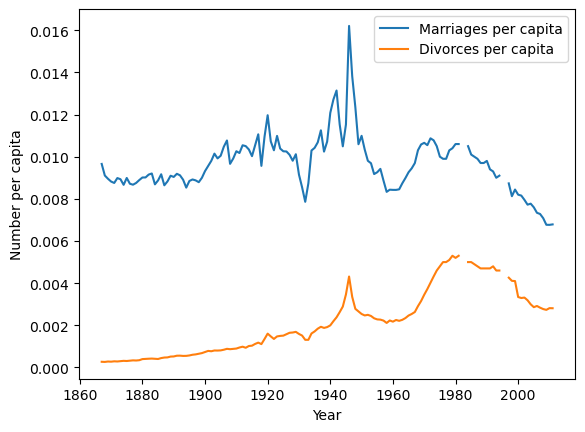

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the dataset from the provided address
marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Create a new column to calculate the number of marriages and divorces per capita
marriage_divorce_data['Marriages_per_capita'] = marriage_divorce_data['Marriages']/marriage_divorce_data['Population']
marriage_divorce_data['Divorces_per_capita'] = marriage_divorce_data['Divorces']/marriage_divorce_data['Population']

# Plot the line chart
plt.plot(marriage_divorce_data['Year'], marriage_divorce_data['Marriages_per_capita'], label='Marriages per capita')
plt.plot(marriage_divorce_data['Year'], marriage_divorce_data['Divorces_per_capita'], label='Divorces per capita')

plt.xlabel('Year')
plt.ylabel('Number per capita')

plt.legend()
plt.show()

# Question 7

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

In [63]:
df = df[df['Year'].isin([1900, 1950, 2000])]

In [64]:
df['Marriages_per_capita'] = df['Marriages']/df['Population']
df['Divorces_per_capita'] = df['Divorces']/df['Population']

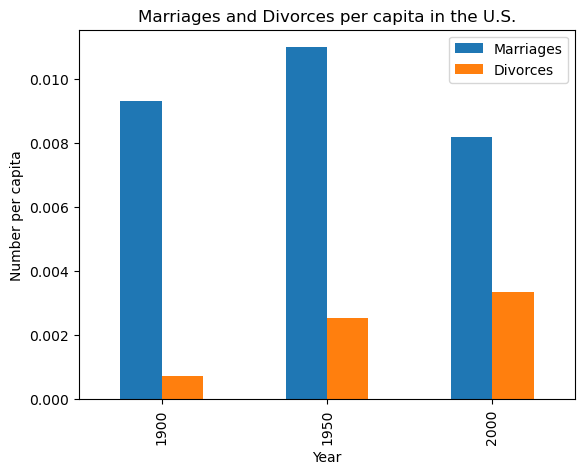

In [65]:
df.plot(x='Year', y=['Marriages_per_capita', 'Divorces_per_capita'], kind='bar')
plt.xlabel('Year')
plt.ylabel('Number per capita')
plt.title('Marriages and Divorces per capita in the U.S.')
plt.legend(['Marriages', 'Divorces'])
plt.show()

# Question 8

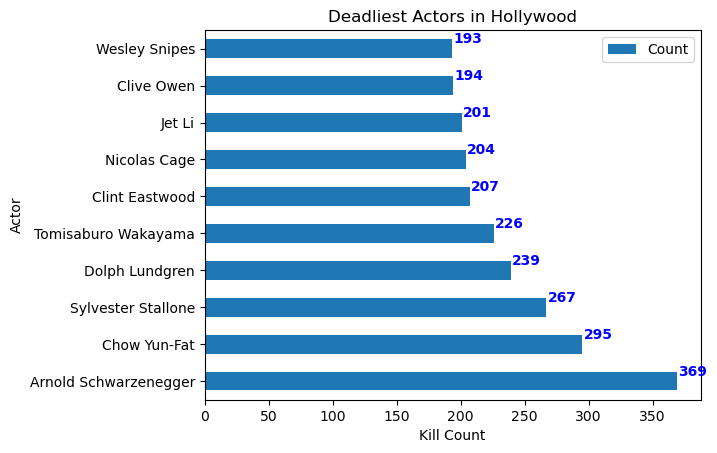

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('actor_kill_counts.csv')

# Sort the actors by their kill count
df = df.sort_values(by='Count', ascending=False)

# Create a horizontal bar chart
df.plot(x='Actor', y='Count', kind='barh')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Add labels to each bar with the corresponding actor's name
for i, v in enumerate(df['Count']):
    plt.text(v + 1, i + .15, str(v), color='blue', fontweight='bold')

plt.show()

# Question 9

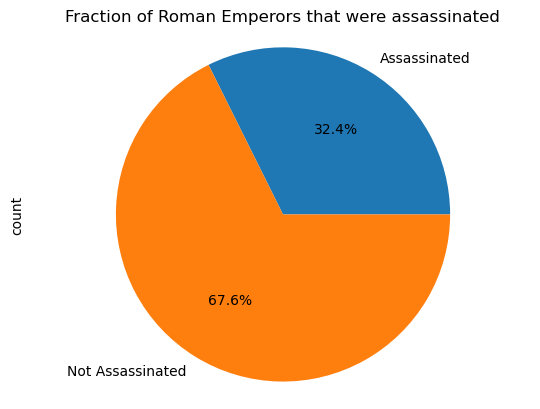

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('roman-emperor-reigns.csv')

# Count the number of Emperors who were assassinated and the number who were not
assassinated = df[df['Cause_of_Death'] == 'Assassinated']['Emperor'].count()
not_assassinated = df[df['Cause_of_Death'] != 'Assassinated']['Emperor'].count()

# Create a pie chart
data = [assassinated, not_assassinated]
labels = ['Assassinated', 'Not Assassinated']
df = pd.DataFrame({'count': data}, index=labels)
df.plot(kind='pie', y='count', legend=False, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Fraction of Roman Emperors that were assassinated')
plt.show()


# Question 10

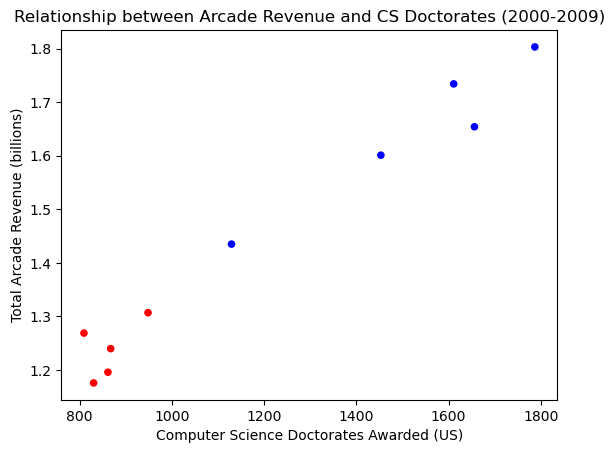

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Create a new DataFrame that includes only the data from 2000 to 2009
df_new = df[(df['Year'] >= 2000) & (df['Year'] <= 2009)]

# Create a scatter plot and color each dot according to its year
colors = np.where(df_new['Year'] < 2005, 'r', 'b')
df_new.plot(x='Computer Science Doctorates Awarded (US)', y='Total Arcade Revenue (billions)', kind='scatter', c=colors)
plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)')
plt.show()
